# Musical Key Detection

This notebook loads an audio file and computes key-related features of that file, including an estimate of the track's key.

While not 100% sure, I think this assumes equal temperament.

Later I'll try to estimate mode in addition to tonic.

This work is demonstrated, sometimes inaccurately, with the following pieces:
- Lady Napalm's "Voice in the Distance" (me)
- Lady Napalm's "Kwiky Bridge (Instant Satisfaction Mix)" (also me)
- Christian Petzoid's (not Bach's) Minuet in G-Major
- Stravinsky's movement #4 of Rite of Spring

The Petzoid piece, being harmonically stable, is used as a "positive control" whilst Stravinsky's piece is used as a "negative control" due to its known polytonality. I'll eventually produce "true" controls as follows:
- Negative control:  A randomly generated chromatic piece
- Positive control:  A randomly generated tonal piece where the tonic is sampled 90% of the time.

Results are mixed. I'll first try to resolve this by varying the hop length (later).

## Load the module containing the class definition

In [1]:
from badass_music.features.KeyDetection import KeyDetection

...and the system modules we need:

In [2]:
import os

## Bach (sort of)

We start with a "Bach" piece because Bach created works with stable key definition.

Actually, this piece was written by Bach's contempory Christian Petzold and [mistakenly attributed to Bach until the 1970s](https://en.wikipedia.org/wiki/Minuets_in_G_major_and_G_minor).  It definitely matches Bach's style.

This piece was written in G-major, but the module I wrote declares it to be in E-minor. Given that G-major and E-minor are related keys (share the same pitch classes but use differing tonics), it is clear that my code (so far) cannot easily distinguish between tonics in the same relative key.

This particular analysis was intended as a "positive control".

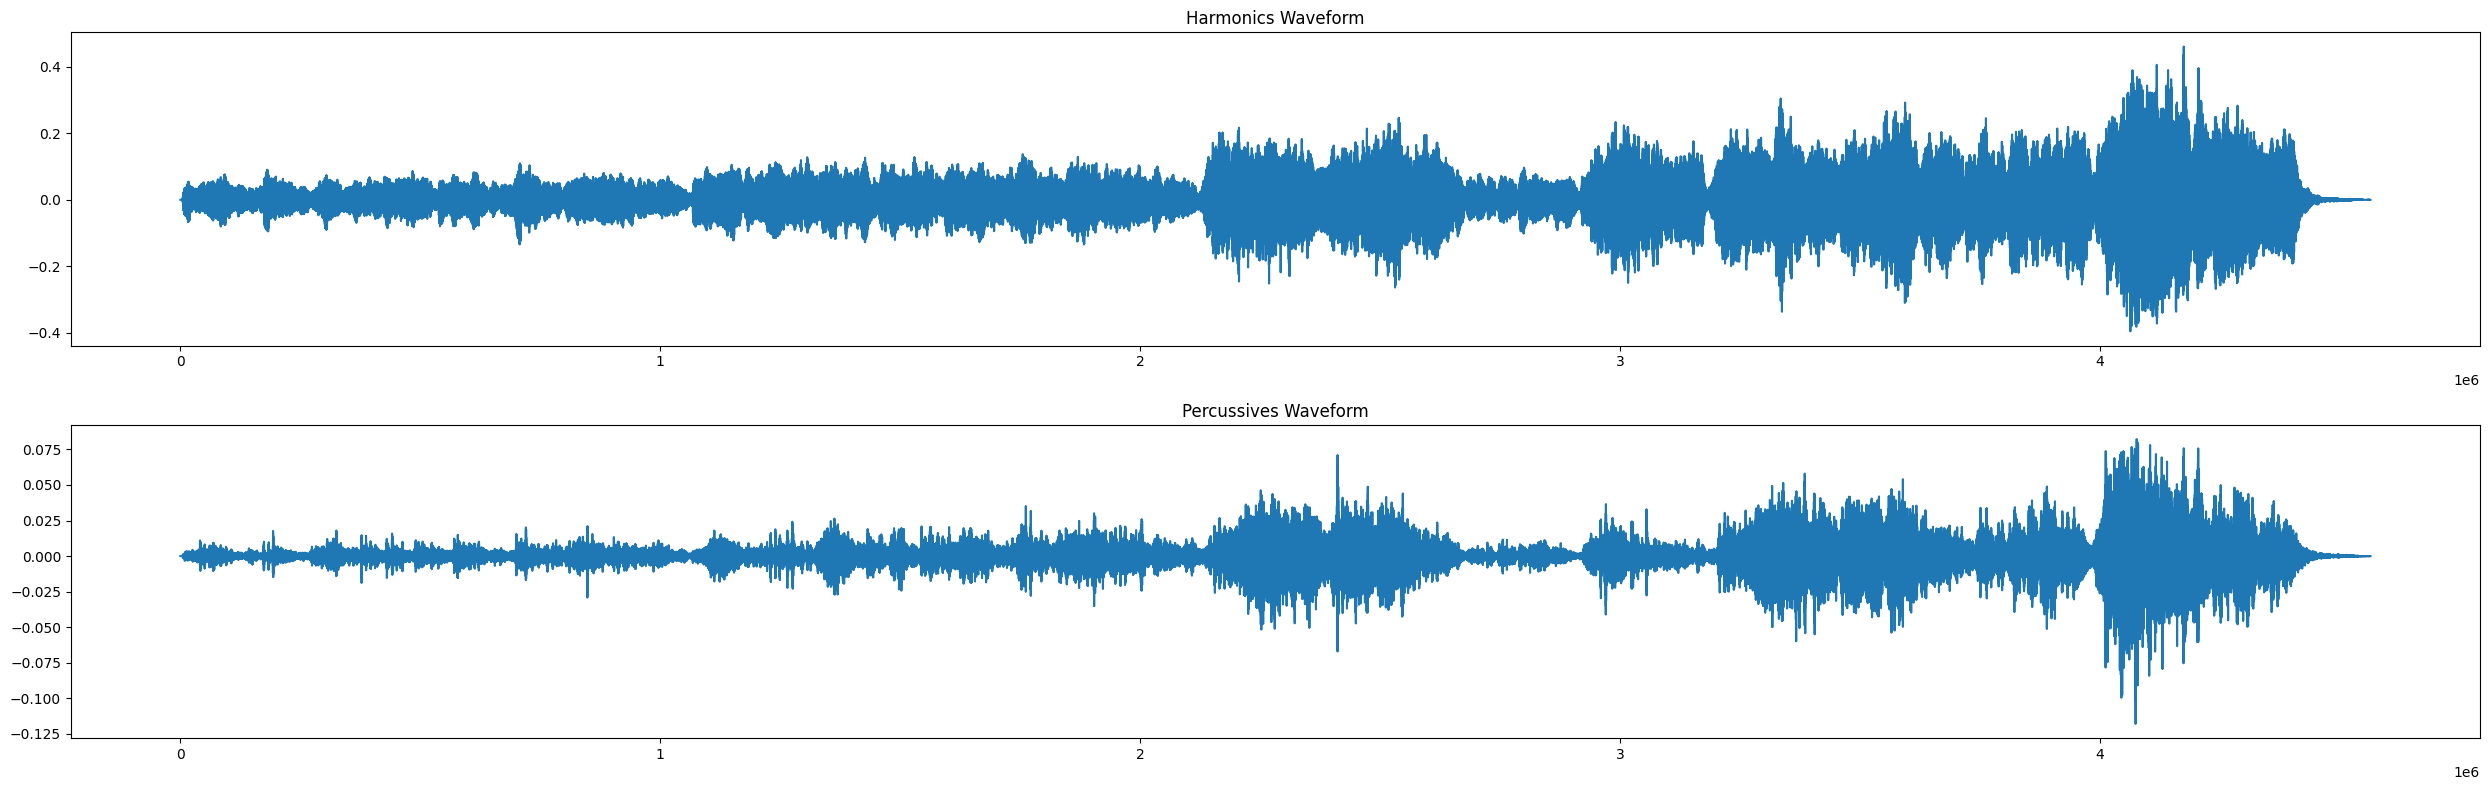

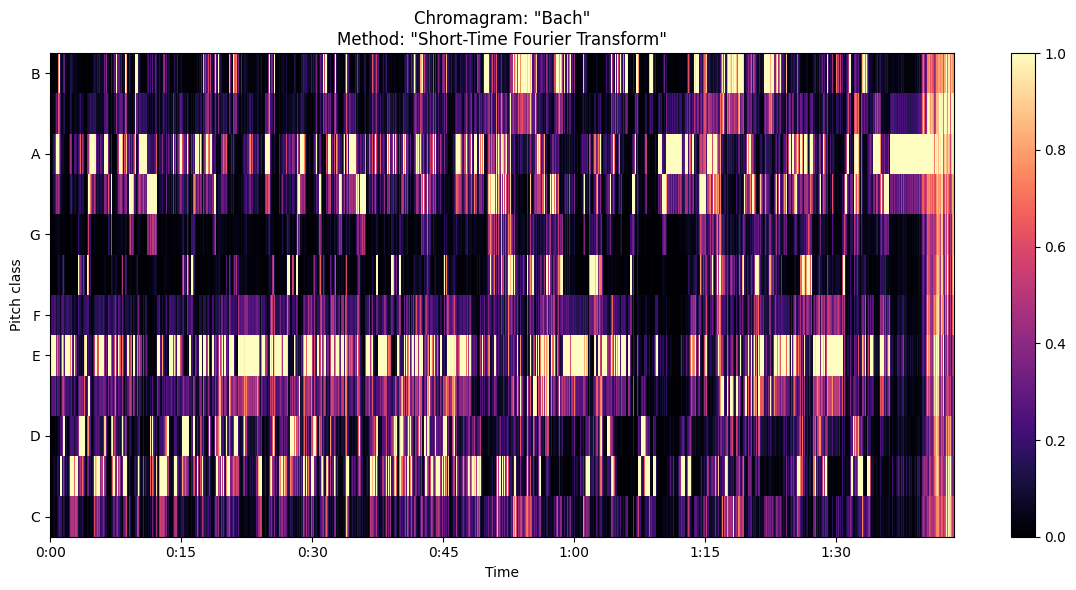

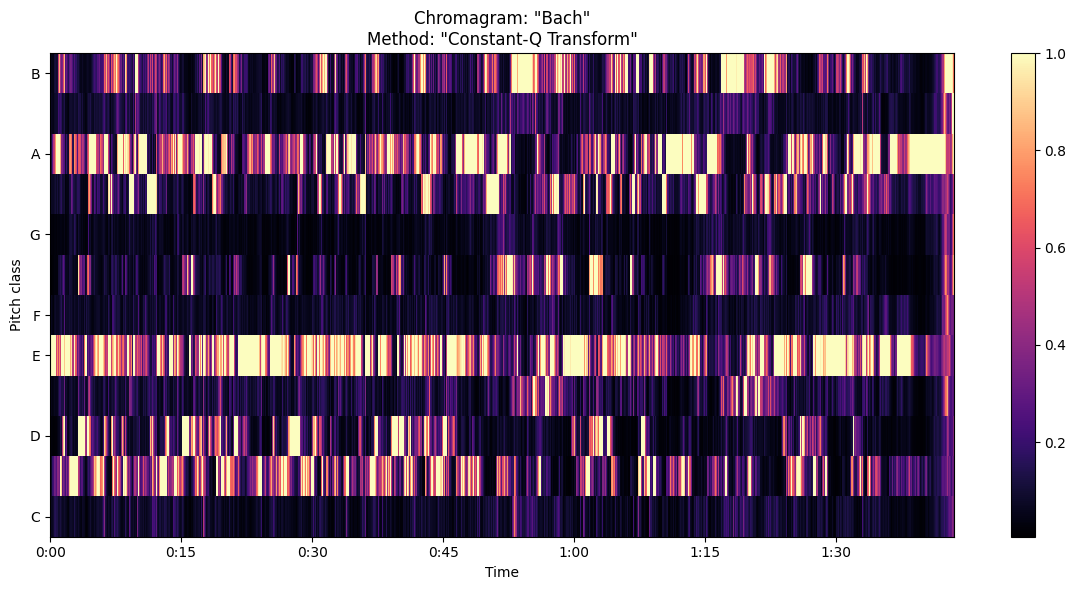

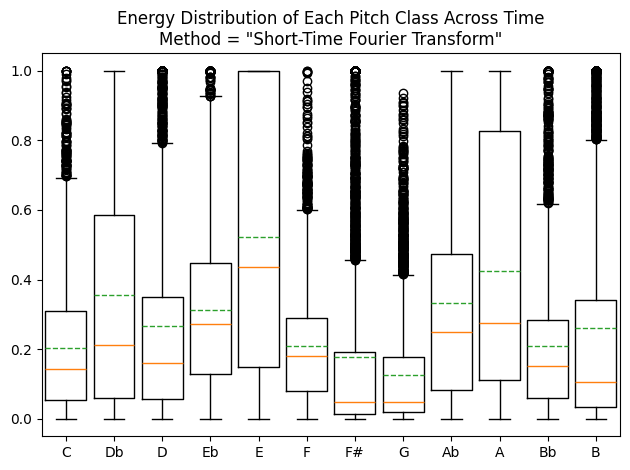

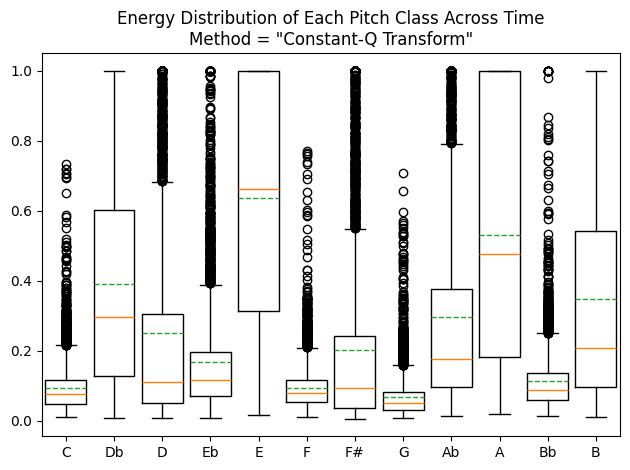

In [3]:
track_to_analyze = os.environ['BMPP_HOME'] + '/badass_music/data/02 - Minuet from The Anna Magdalena Bach Notebook, Anh. 114.mp3'
track_name = 'Bach'
t_bach = KeyDetection(track_to_analyze, track_name)
t_bach.fit()
t_bach.summary_full()

In [4]:
t_bach.df

,track_title,track_to_analyze_filename,method,hop_length,hop_length_in_seconds,key_as_chromatic_index,key_as_pitch_class,dissimilarity_index,kurtosis,entropy
0,Bach,/home/emily/Desktop/projects/music-production-...,Short-Time Fourier Transform,1024,0.021333,4,E,0.155773,-0.206856,2.415076
1,Bach,/home/emily/Desktop/projects/music-production-...,Constant-Q Transform,1024,0.021333,4,E,0.272845,-0.490005,2.277656


## Stravinsky

One analysis method estimated the tonic correctly (Eb), while the other analysis method estimated the key as "F".

Google's AI says the piece is in Eb-Dorian with the prompt "What key is Stravinsky's Part One - Spring Rounds in?". However, Stravinsky's polytonality is probably picked up by the analysis, which I expected it to.

This particular analysis is intended as a "negative control".

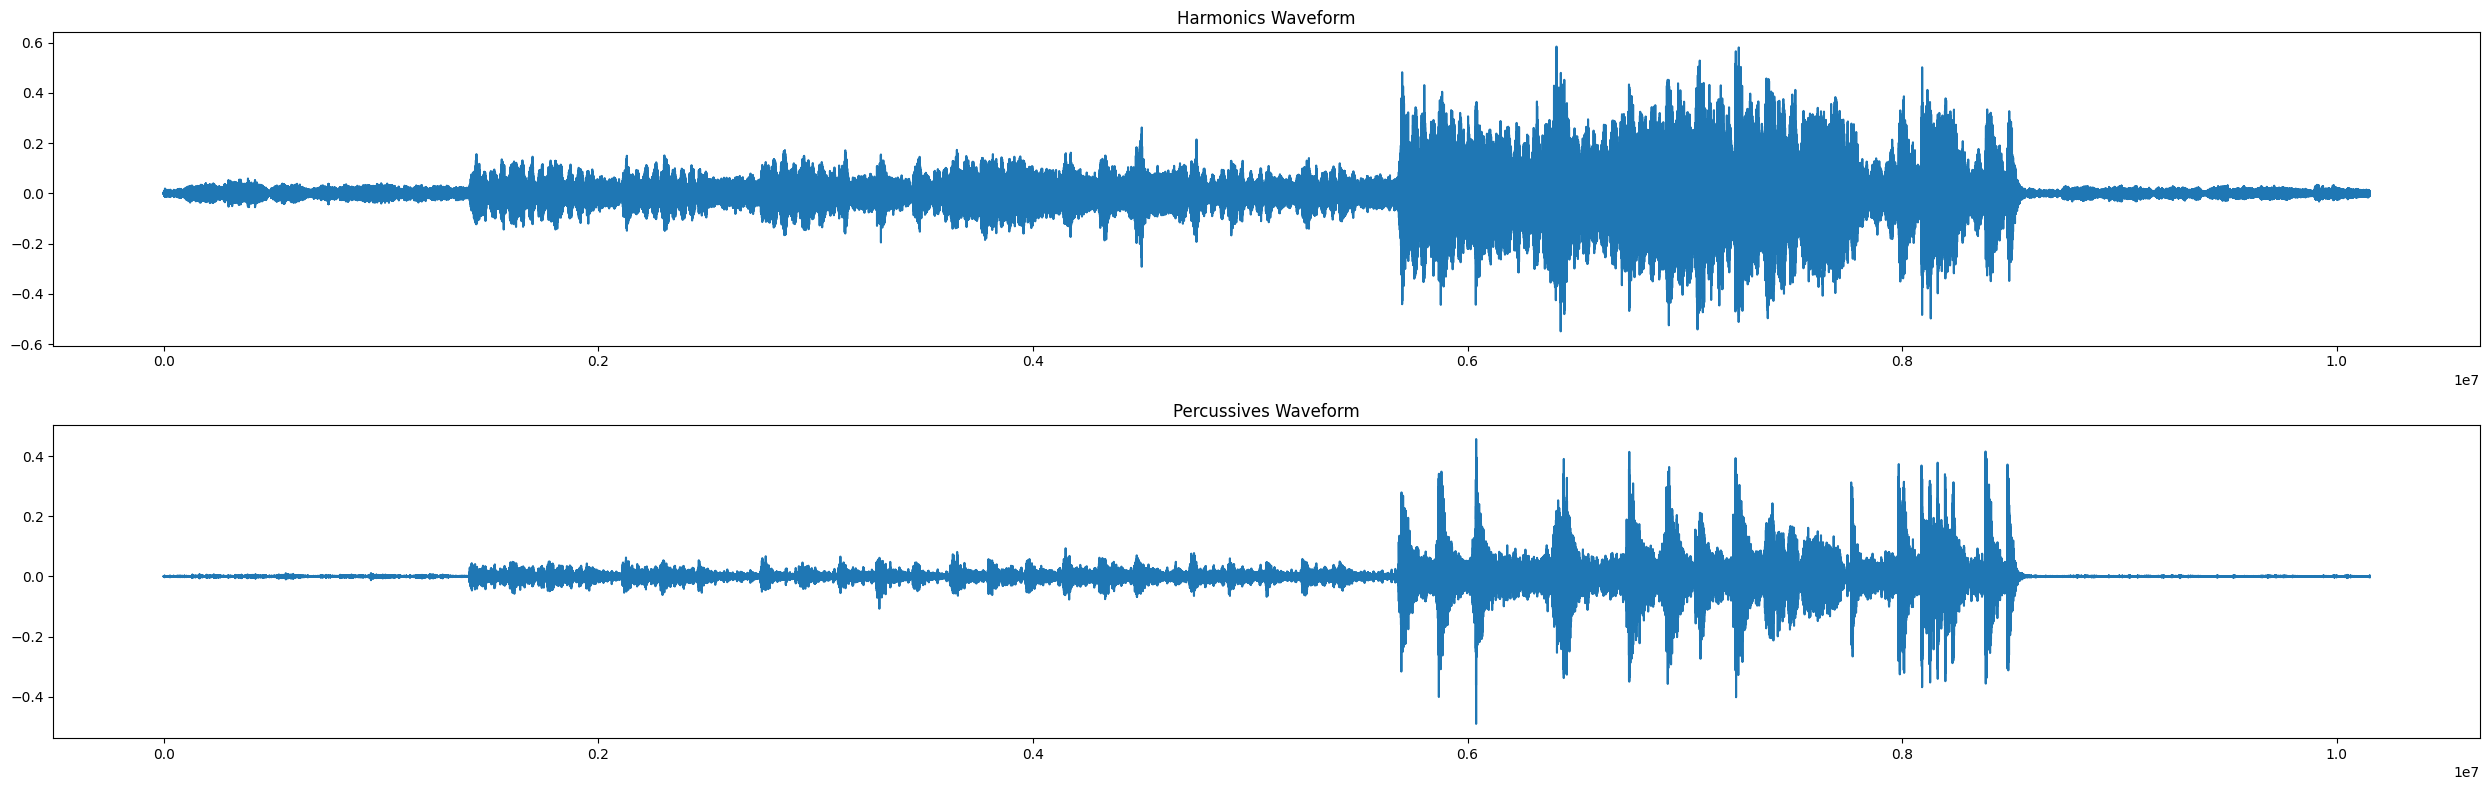

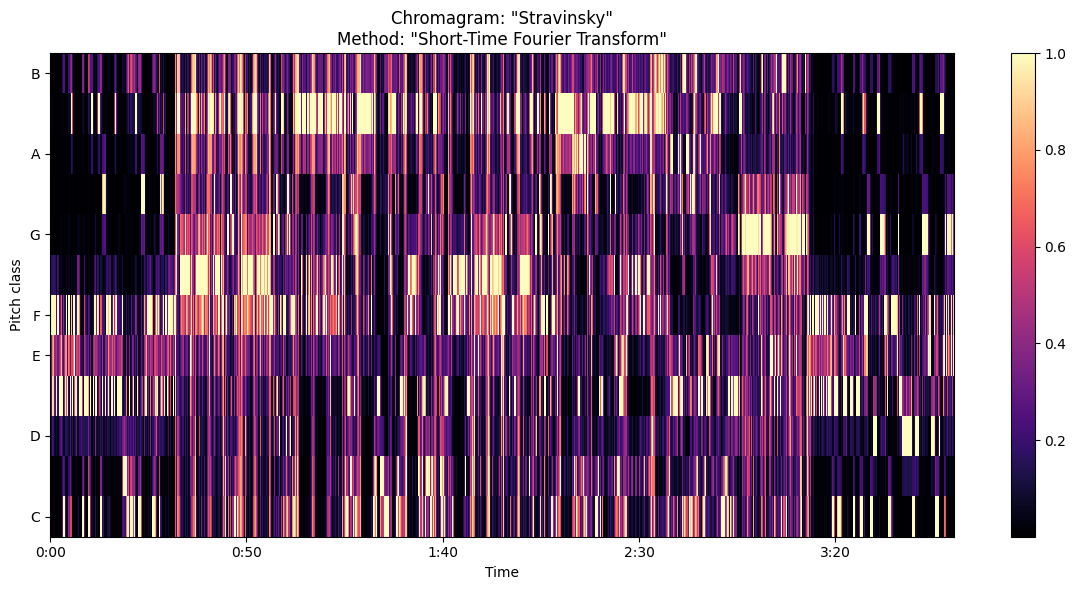

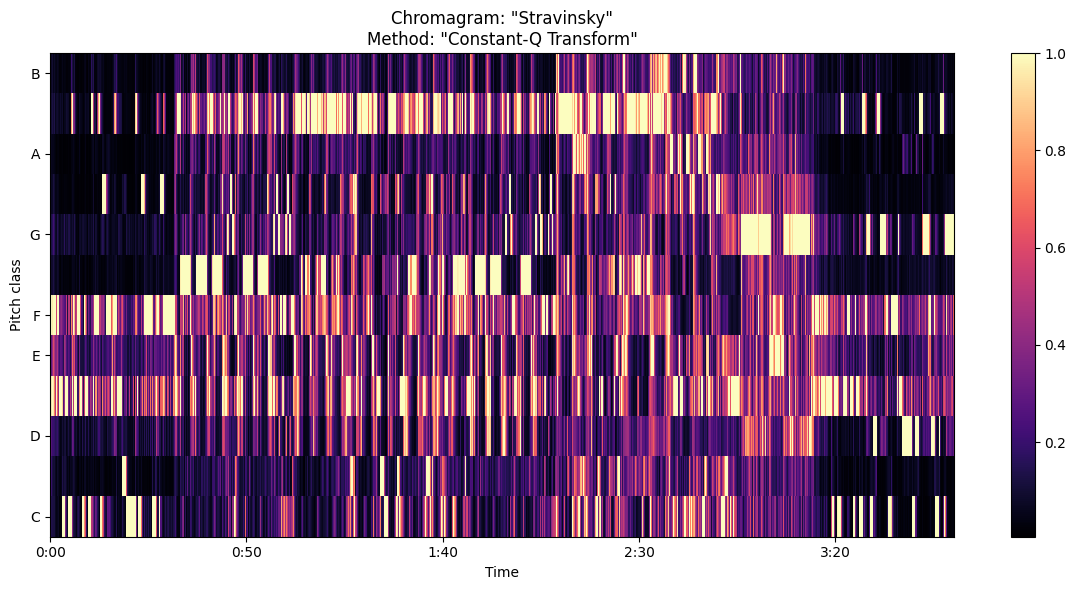

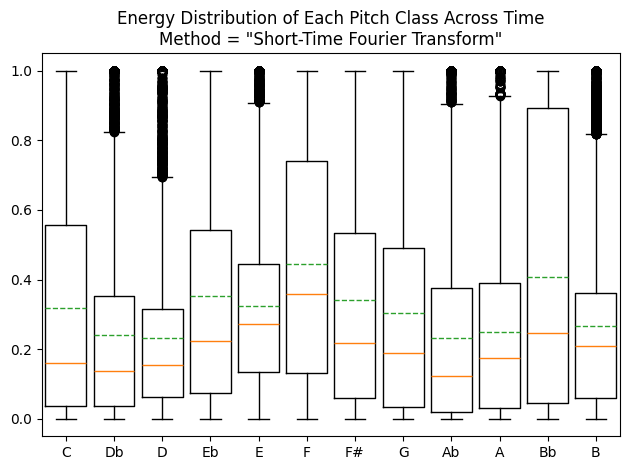

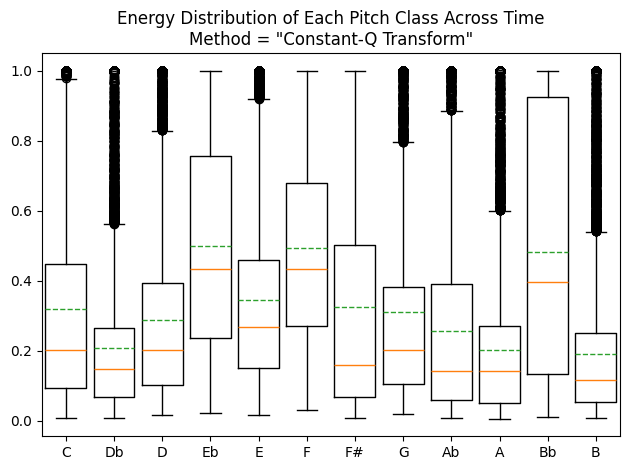

In [5]:
track_to_analyze = os.environ['BMPP_HOME'] + '/badass_music/data/04 - The Rite of Spring (Scenes of Pagan Russia in Two Parts)_ Part One - Spring Rounds (1921 Version).mp3'
track_name = 'Stravinsky'
t_strv = KeyDetection(track_to_analyze, track_name)
t_strv.fit()
t_strv.summary_full()

In [6]:
t_strv.df

,track_title,track_to_analyze_filename,method,hop_length,hop_length_in_seconds,key_as_chromatic_index,key_as_pitch_class,dissimilarity_index,kurtosis,entropy
0,Stravinsky,/home/emily/Desktop/projects/music-production-...,Short-Time Fourier Transform,1024,0.021333,5,F,0.088677,-0.703946,2.462606
1,Stravinsky,/home/emily/Desktop/projects/music-production-...,Constant-Q Transform,1024,0.021333,3,Eb,0.130234,-1.048805,2.432782


## Lady Napalm - Kwiky Bridge (Instant Satisfaction Mix)

I know this is in the key of C, because I wrote it.

This would be a good case for code that detects whether the track is major or minor (from the viewpoint of a DJ). In the boxplots below you can see that neither the minor- nor major-third (Eb and E, respectively) is strongly distinguished from the other.

Rekordbox says this is C-minor (5A).

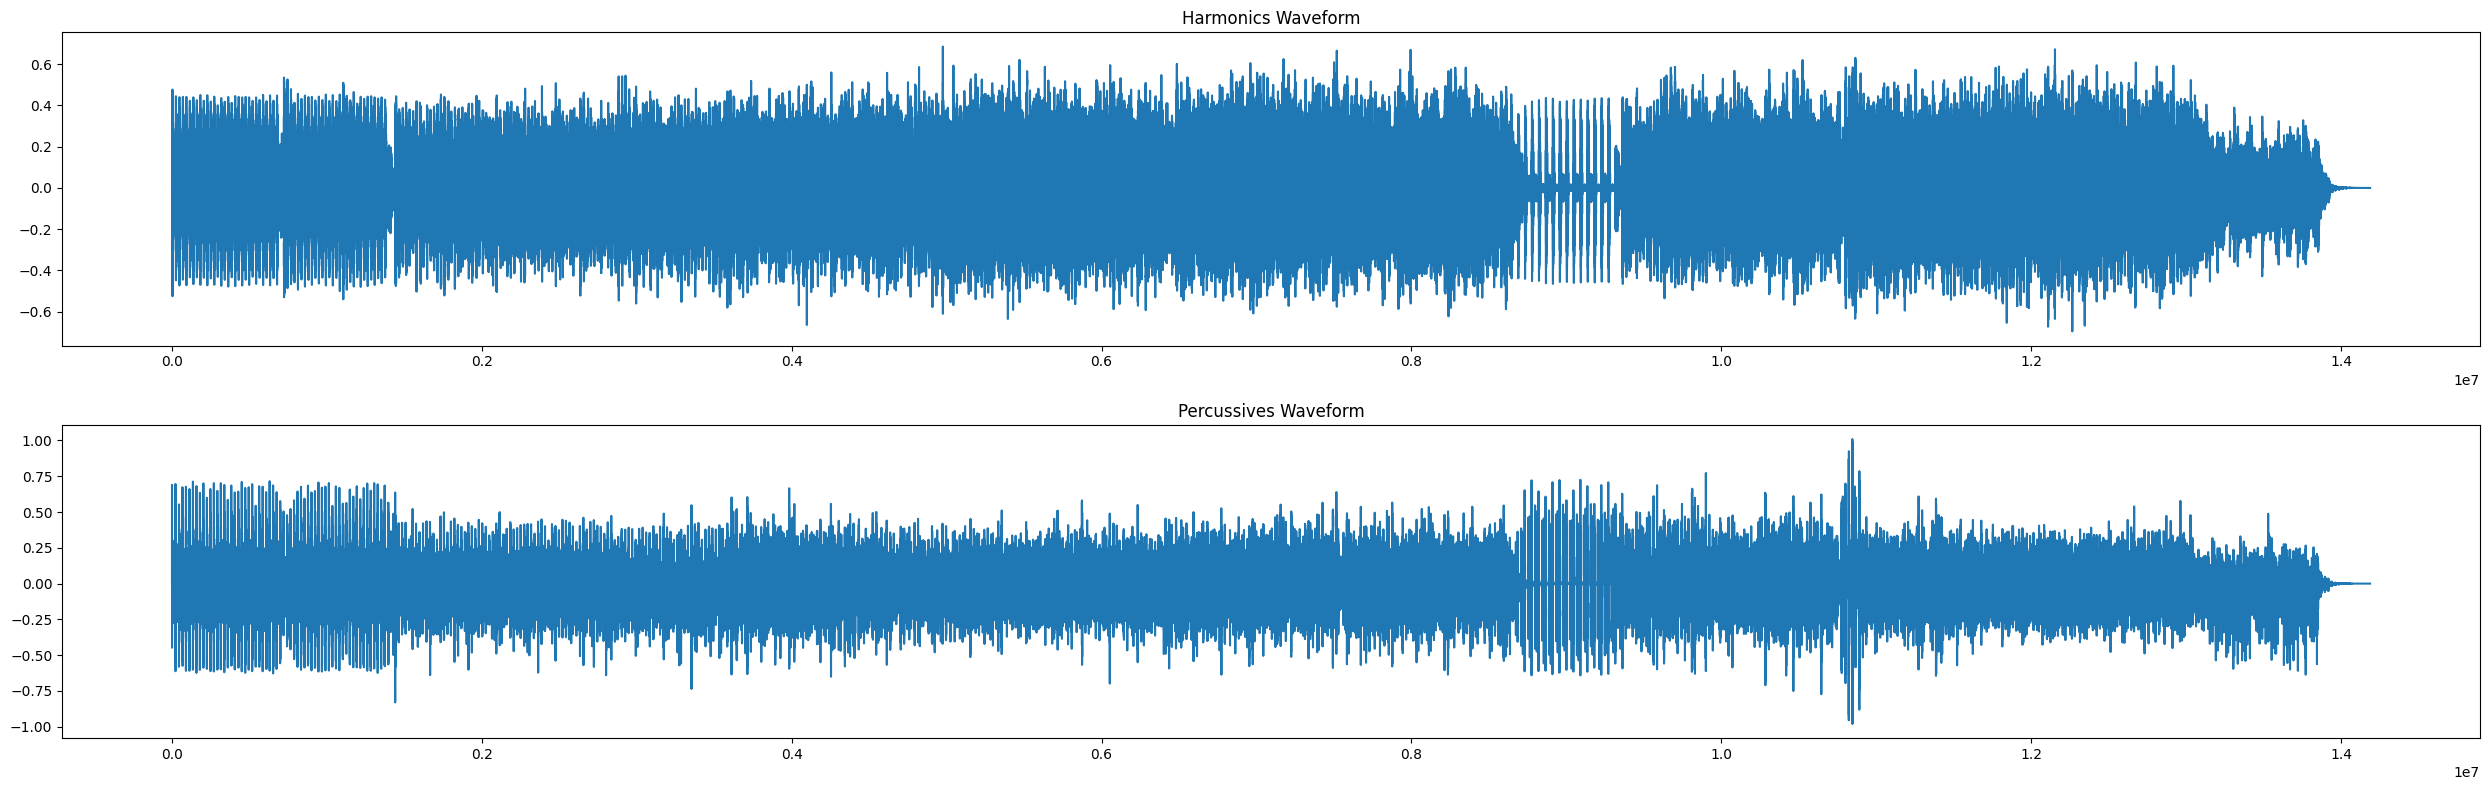

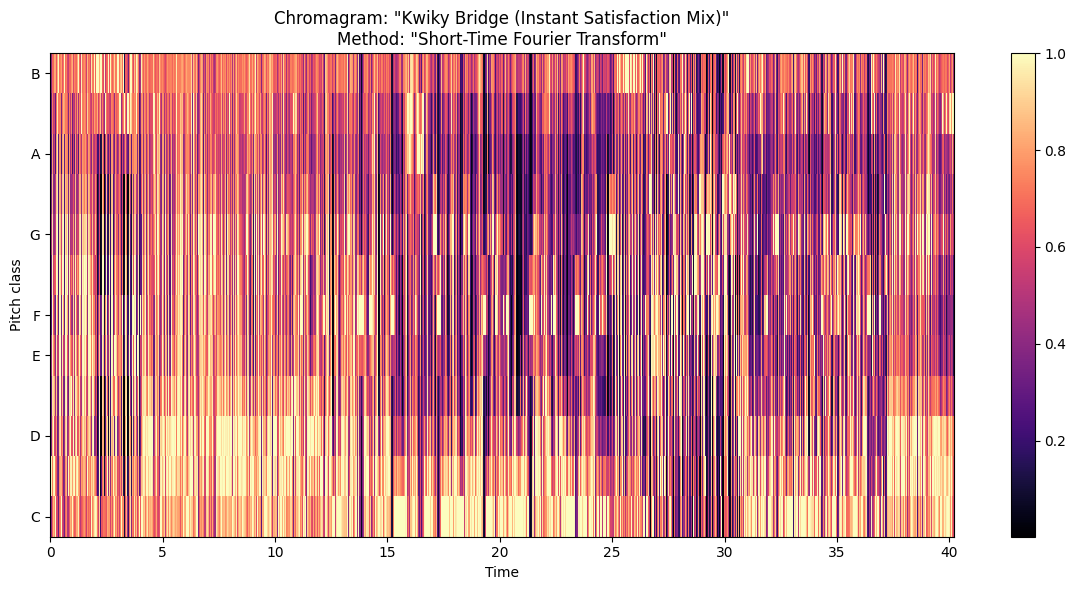

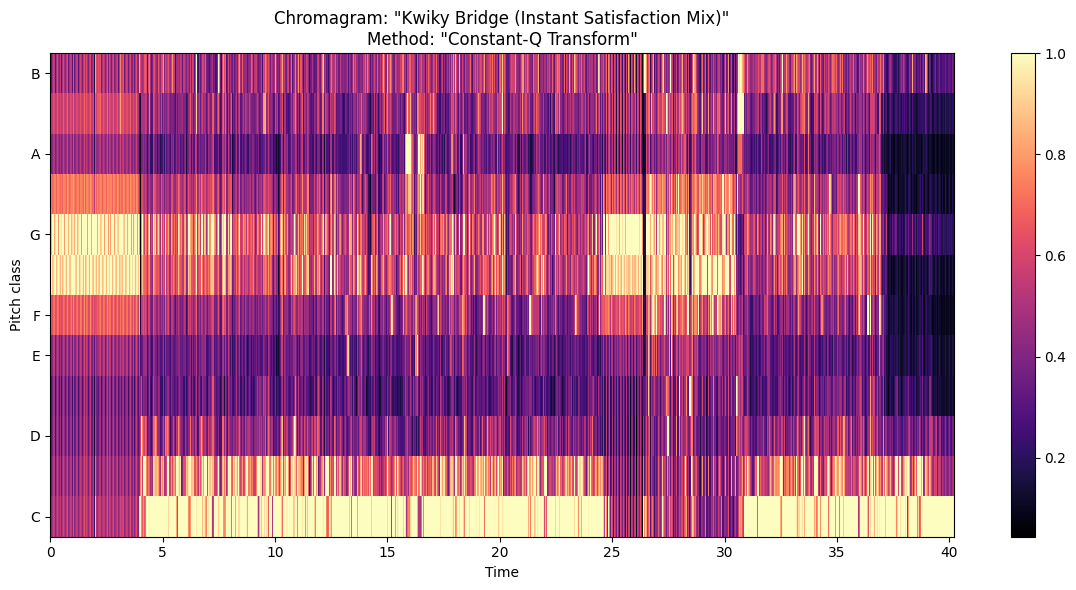

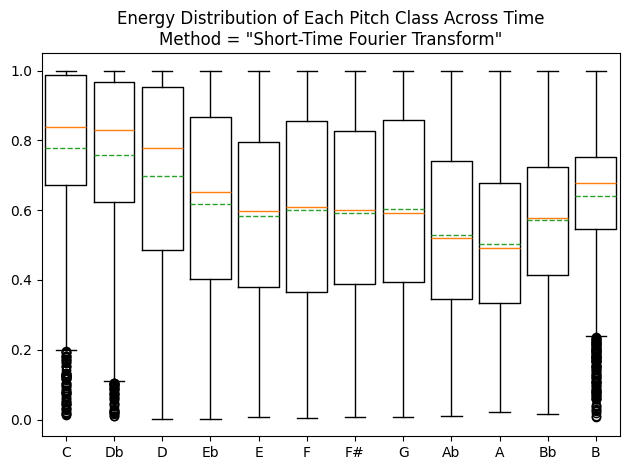

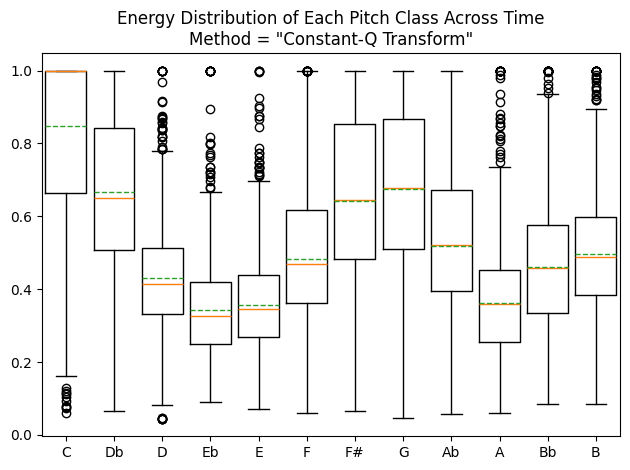

In [7]:
track_to_analyze = os.environ['BMPP_HOME'] + '/badass_music/data/Lady Napalm - Kwiky Bridge (Instant Satisfaction Mix).mp3'
track_name = 'Kwiky Bridge (Instant Satisfaction Mix)'
t_kb = KeyDetection(track_to_analyze, track_name, hop_length = 4096 * 2)
t_kb.fit()
t_kb.summary_full()

In [8]:
t_kb.df

,track_title,track_to_analyze_filename,method,hop_length,hop_length_in_seconds,key_as_chromatic_index,key_as_pitch_class,dissimilarity_index,kurtosis,entropy
0,Kwiky Bridge (Instant Satisfaction Mix),/home/emily/Desktop/projects/music-production-...,Short-Time Fourier Transform,8192,0.170667,0,C,0.050880,-0.529555,2.476819
1,Kwiky Bridge (Instant Satisfaction Mix),/home/emily/Desktop/projects/music-production-...,Constant-Q Transform,8192,0.170667,0,C,0.117021,-0.449410,2.446302


## Lady Napalm - Voice in the Distance

While never certain due to its high chromaticism, I've always considered this piece to be in the key of F#... and I wrote it.

That being said, the verses are in a strong D-major, thereby having the major-third of F# strongly represented.

The chromatic parts were roughly created around F#.

The following analysis agrees with my estimate.

However, Rekordbox says this is Bb-minor (3A). There is probably an explanation available from music theory--I'll look into it!

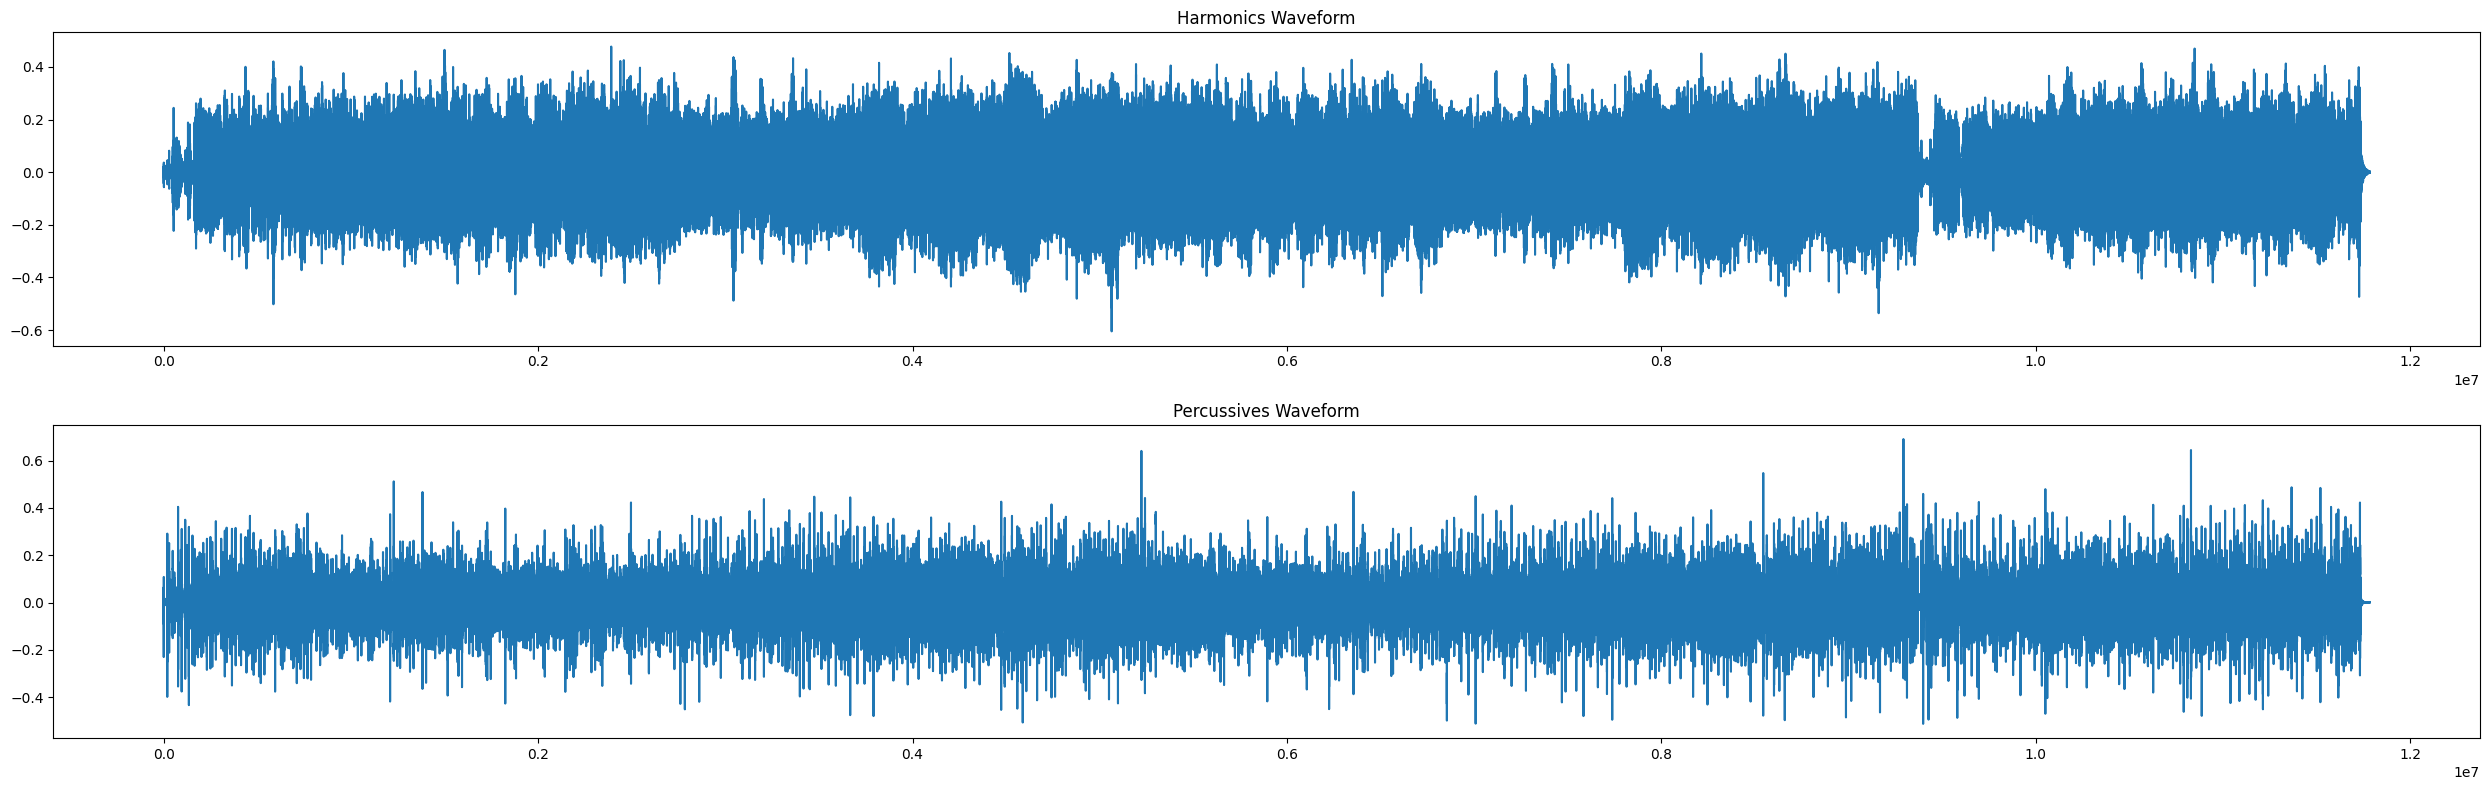

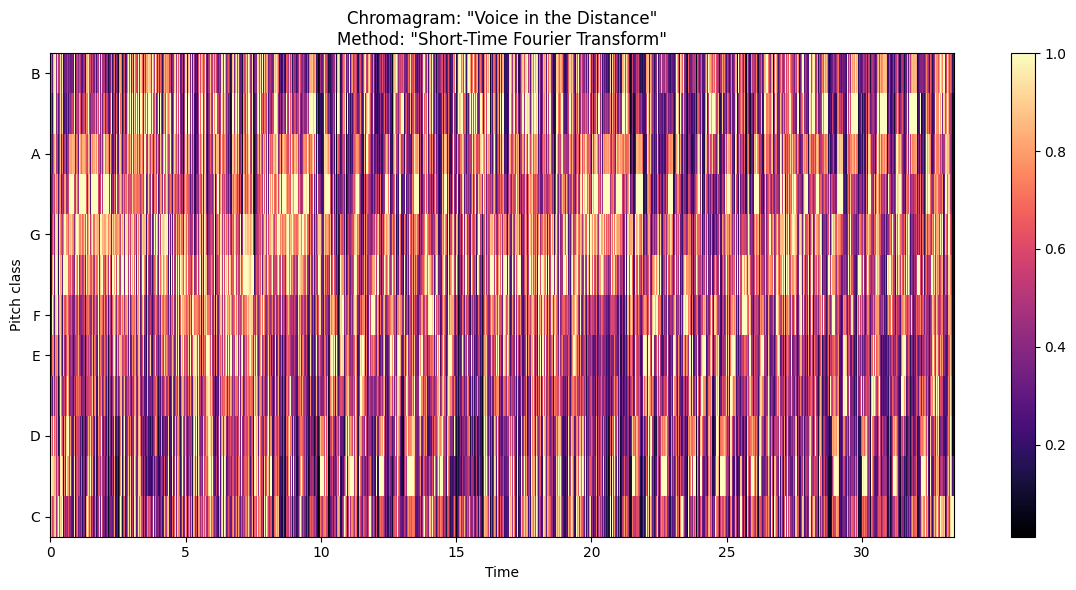

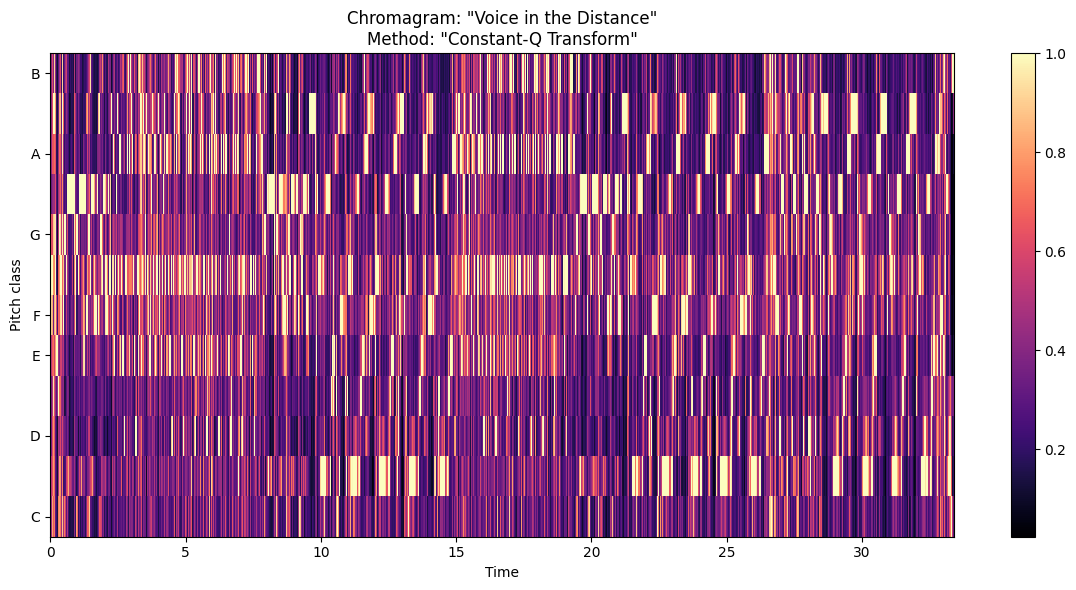

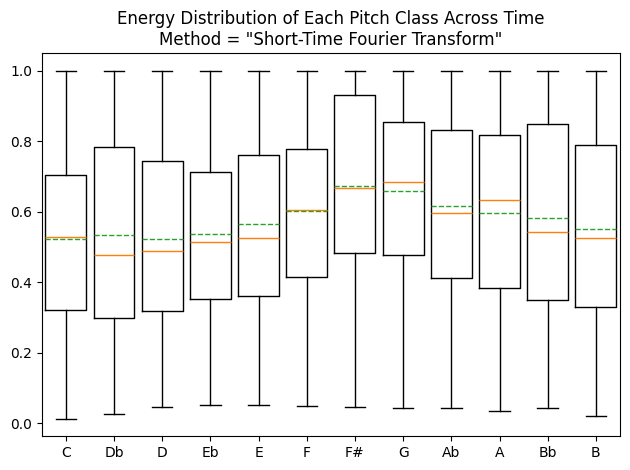

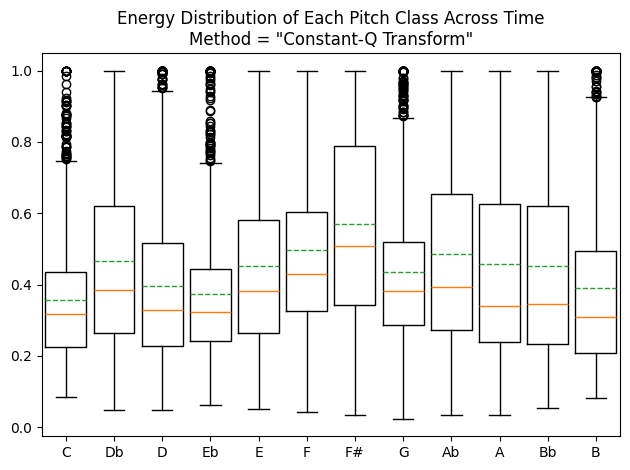

In [9]:
track_to_analyze = os.environ['BMPP_HOME'] + '/badass_music/data/Lady Napalm - Voice in the Distance.mp3'
track_name = 'Voice in the Distance'
t_vd = KeyDetection(track_to_analyze, track_name, hop_length = 4096 * 2)
t_vd.fit()
t_vd.summary_full()

In [10]:
t_vd.df

,track_title,track_to_analyze_filename,method,hop_length,hop_length_in_seconds,key_as_chromatic_index,key_as_pitch_class,dissimilarity_index,kurtosis,entropy
0,Voice in the Distance,/home/emily/Desktop/projects/music-production-...,Short-Time Fourier Transform,8192,0.170667,6,F#,0.035704,-0.822972,2.481415
1,Voice in the Distance,/home/emily/Desktop/projects/music-production-...,Constant-Q Transform,8192,0.170667,6,F#,0.050687,-0.174428,2.476717
